In [1]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName('operations').getOrCreate()
from pyspark.sql import *

2021-10-01 10:39:20,462 WARN util.NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


In [2]:
import pandas as pd

In [3]:
covdatapath="/sparkTemp/covid19/country_wise_latest.csv"

In [4]:
covdf = spark.read.csv(covdatapath, header='true', inferSchema='true')

In [4]:
covdf.show()

+-------------------+---------+------+---------+------+---------+----------+-------------+------------------+---------------------+----------------------+-------------------+-------------+-----------------+--------------------+
|     Country/Region|Confirmed|Deaths|Recovered|Active|New cases|New deaths|New recovered|Deaths / 100 Cases|Recovered / 100 Cases|Deaths / 100 Recovered|Confirmed last week|1 week change|1 week % increase|          WHO Region|
+-------------------+---------+------+---------+------+---------+----------+-------------+------------------+---------------------+----------------------+-------------------+-------------+-----------------+--------------------+
|        Afghanistan|    36263|  1269|    25198|  9796|      106|        10|           18|               3.5|                69.49|                  5.04|              35526|          737|             2.07|Eastern Mediterra...|
|            Albania|     4880|   144|     2745|  1991|      117|         6|           6

In [5]:
covdf.printSchema()

root
 |-- Country/Region: string (nullable = true)
 |-- Confirmed: integer (nullable = true)
 |-- Deaths: integer (nullable = true)
 |-- Recovered: integer (nullable = true)
 |-- Active: integer (nullable = true)
 |-- New cases: integer (nullable = true)
 |-- New deaths: integer (nullable = true)
 |-- New recovered: integer (nullable = true)
 |-- Deaths / 100 Cases: double (nullable = true)
 |-- Recovered / 100 Cases: double (nullable = true)
 |-- Deaths / 100 Recovered: string (nullable = true)
 |-- Confirmed last week: integer (nullable = true)
 |-- 1 week change: integer (nullable = true)
 |-- 1 week % increase: double (nullable = true)
 |-- WHO Region: string (nullable = true)



In [8]:
import pyspark.sql.functions as func

In [9]:
from pyspark.sql.functions import col, floor

In [10]:
from pyspark.sql.types import IntegerType

In [11]:
df1=covdf.withColumn("col4",floor(func.round(covdf['Deaths / 100 Cases'])).cast('int'))

In [75]:
df1.show()

+-------------------+---------+------+---------+------+---------+----------+-------------+------------------+---------------------+----------------------+-------------------+-------------+-----------------+--------------------+----+
|     Country/Region|Confirmed|Deaths|Recovered|Active|New cases|New deaths|New recovered|Deaths / 100 Cases|Recovered / 100 Cases|Deaths / 100 Recovered|Confirmed last week|1 week change|1 week % increase|          WHO Region|col4|
+-------------------+---------+------+---------+------+---------+----------+-------------+------------------+---------------------+----------------------+-------------------+-------------+-----------------+--------------------+----+
|        Afghanistan|    36263|  1269|    25198|  9796|      106|        10|           18|               3.5|                69.49|                  5.04|              35526|          737|             2.07|Eastern Mediterra...|   4|
|            Albania|     4880|   144|     2745|  1991|      117|   

In [12]:
df1=df1.sort(col("col4").desc()).limit(10)

In [13]:
df1=df1.select("Country/Region","col4")

In [9]:
import matplotlib.pyplot as plt

In [15]:
df1=df1.toPandas()

In [16]:
x = df1['Country/Region']
y = df1['col4']

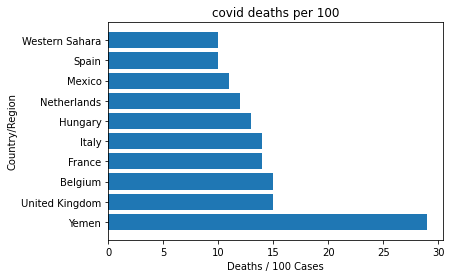

In [17]:
plt.barh(x,y)
plt.title('covid deaths per 100')
plt.ylabel('Country/Region')
plt.xlabel('Deaths / 100 Cases')
plt.show()

In [ ]:
plt.barh(x,y)
plt.title('covid deaths per 100')
plt.ylabel('Country/Region')
plt.xlabel('Deaths / 100 Cases')
plt.show()

In [91]:
df2=covdf.withColumn("col4",floor(func.round(covdf['Recovered / 100 Cases'])).cast('int'))

In [92]:
df2=df2.sort(col("col4").desc()).limit(10)

In [95]:
df2=df2.select("Country/Region","col4")

In [96]:
df2=df2.toPandas()

In [97]:
x = df2['Country/Region']
y = df2['col4']

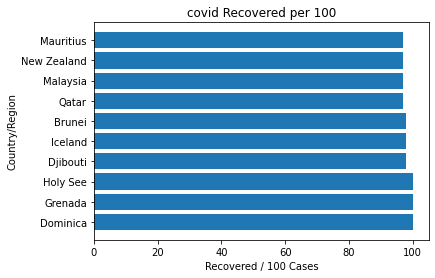

In [98]:
plt.barh(x,y)
plt.title('covid Recovered per 100')
plt.ylabel('Country/Region')
plt.xlabel('Recovered / 100 Cases')
plt.show()

In [107]:
df3=covdf.withColumn("col4",floor(func.round(covdf['Deaths / 100 Recovered'])).cast('int'))

In [108]:
df3=df3.sort(col("col4").desc()).limit(10)

In [109]:
df3=df3.select("Country/Region","col4")

In [110]:
df3=df3.toPandas()

In [111]:
x = df3['Country/Region']
y = df3['col4']

In [ ]:
plt.barh(x,y)
plt.title('Deaths / 100 Recovered')
plt.ylabel('Country/Region')
plt.xlabel('Deaths / 100 Cases')
plt.show()

In [5]:
df4 = covdf.select("Country/Region","Confirmed","Deaths","Recovered").limit(10)

In [6]:
df4=df4.toPandas()

In [7]:
df4.to_pickle("dataframe.pkl")

In [8]:
df5 = pd.read_pickle("dataframe.pkl")

In [9]:
df5.head()

,Country/Region,Confirmed,Deaths,Recovered
0,Afghanistan,36263,1269,25198
1,Albania,4880,144,2745
2,Algeria,27973,1163,18837
3,Andorra,907,52,803
4,Angola,950,41,242


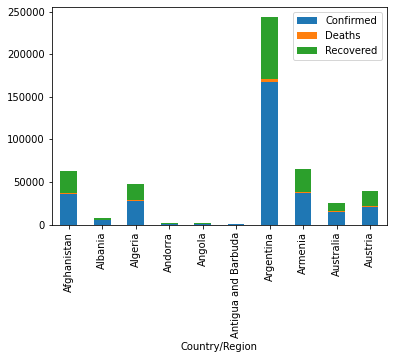

In [4]:
ax = df5.set_index('Country/Region').plot.bar(stacked=True)

In [5]:
import seaborn as sns

<AxesSubplot:xlabel='Country/Region'>

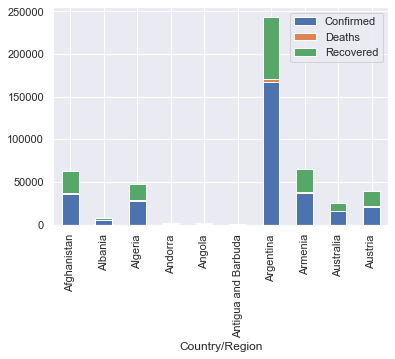

In [12]:
sns.set()
df5.set_index('Country/Region').plot(kind='bar', stacked=True)

In [24]:
df6 = covdf.select("Country/Region","New cases","New deaths","New recovered").limit(10)

In [25]:
df6=df6.toPandas()

<AxesSubplot:xlabel='Country/Region'>

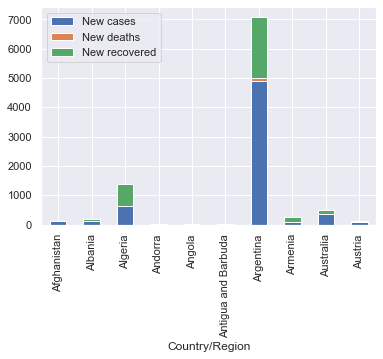

In [26]:
df6.set_index('Country/Region').plot.bar(stacked=True)